In [ ]:
import pandas as pd
df=pd.read_csv('/content/Country-data.csv')
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
X=df.drop(['country','child_mort','health','life_expec','total_fer'],axis=1)
X

,exports,imports,income,inflation,gdpp
0,10.0,44.9,1610,9.44,553
1,28.0,48.6,9930,4.49,4090
2,38.4,31.4,12900,16.10,4460
3,62.3,42.9,5900,22.40,3530
4,45.5,58.9,19100,1.44,12200
...,...,...,...,...,...
162,46.6,52.7,2950,2.62,2970
163,28.5,17.6,16500,45.90,13500
164,72.0,80.2,4490,12.10,1310
165,30.0,34.4,4480,23.60,1310


In [ ]:
X.dtypes

exports      float64
imports      float64
income         int64
inflation    float64
gdpp           int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X= sc.fit_transform(X)

In [ ]:
X = pd.DataFrame(X)
X

,0,1,2,3,4
0,-1.138280,-0.082455,-0.808245,0.157336,-0.679180
1,-0.479658,0.070837,-0.375369,-0.312347,-0.485623
2,-0.099122,-0.641762,-0.220844,0.789274,-0.465376
3,0.775381,-0.165315,-0.585043,1.387054,-0.516268
4,0.160668,0.497568,0.101732,-0.601749,-0.041817
...,...,...,...,...,...
162,0.200917,0.240700,-0.738527,-0.489784,-0.546913
163,-0.461363,-1.213499,-0.033542,3.616865,0.029323
164,1.130305,1.380030,-0.658404,0.409732,-0.637754
165,-0.406478,-0.517472,-0.658924,1.500916,-0.637754


In [ ]:
from sklearn.cluster import KMeans

# finding the optimum no:of clusters using elbow method
k_c = range(1,8)
inertia =[]
for i in k_c:
  model = KMeans(n_clusters=i)
  model.fit(X)
  inertia.append(model.inertia_)


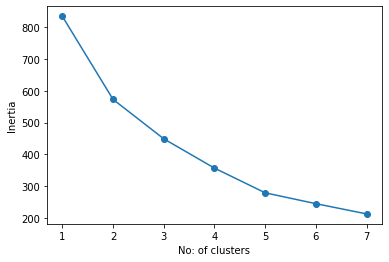

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_c,inertia,'-o')
plt.xlabel('No: of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# optimum no:of clusters = 3
#modelling and predicting the label 
model1 =KMeans(n_clusters=3)
model1.fit(X)
label = model1.predict(X)
print(label)

[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


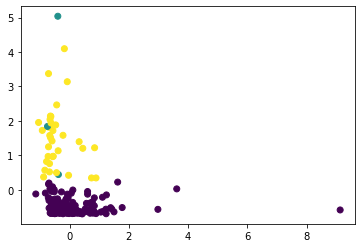

In [ ]:
plt.scatter(X.iloc[:,3],X.iloc[:,4],c=label)

In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(sc,model1)
pipe.fit(X)
label1 = pipe.predict(X)
label1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
country = df['country']
data1 = pd.DataFrame({'label':label1,'country':country})
data1

,label,country
0,0,Afghanistan
1,0,Albania
2,0,Algeria
3,0,Angola
4,0,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,0,Yemen


In [ ]:
pd.crosstab(data1['country'],data1['label'])

label,0,1,2
country,,,
Afghanistan,1,0,0
Albania,1,0,0
Algeria,1,0,0
Angola,1,0,0
Antigua and Barbuda,1,0,0
...,...,...,...
Vanuatu,1,0,0
Venezuela,1,0,0
Vietnam,1,0,0


In [ ]:
Y = df.drop(['country','exports','imports','income','inflation','gdpp'],axis=1)

In [ ]:
Y.dtypes

child_mort    float64
health        float64
life_expec    float64
total_fer     float64
dtype: object

In [ ]:
Y= sc.fit_transform(Y)
Y = pd.DataFrame(Y)

In [ ]:
# finding the optimum no:of clusters using elbow method
k_c = range(1,8)
inertia =[]
for i in k_c:
  model = KMeans(n_clusters=i)
  model.fit(Y)
  inertia.append(model.inertia_)


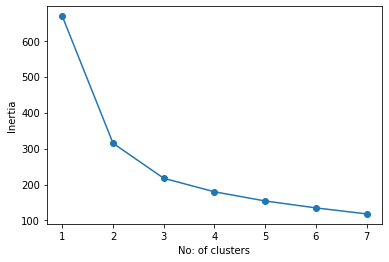

In [ ]:
plt.plot(k_c,inertia,'-o')
plt.xlabel('No: of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# optimum no:of clusters = 3
#modelling and predicting the label 
model =KMeans(n_clusters=3)
model.fit(Y)
label = model.predict(Y)
print(label)

[1 2 2 1 2 0 2 0 0 2 0 2 2 0 2 0 2 1 2 2 0 1 0 2 2 1 1 2 1 0 2 1 1 0 2 0 1
 1 1 0 1 0 2 0 0 2 0 2 2 1 1 2 2 0 0 1 1 0 0 1 0 2 2 1 1 2 1 0 0 2 2 2 1 0
 0 0 2 0 0 2 1 1 2 2 1 2 0 1 1 2 2 0 2 1 1 2 2 1 0 1 2 0 0 2 0 2 1 2 1 2 0
 0 1 1 0 2 1 0 2 2 2 0 0 2 2 2 1 2 2 1 0 2 1 2 0 0 1 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 0 2 0 0 0 2 2 2 2 1 1]


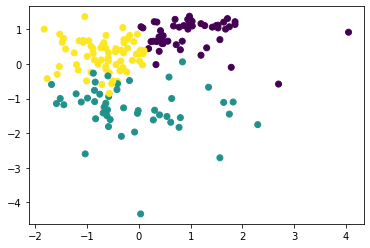

In [ ]:
plt.scatter(Y.iloc[:,1],Y.iloc[:,2],c=label)

In [ ]:
pipe = make_pipeline(sc,model)
pipe.fit(Y)
label2 = pipe.predict(Y)
label2

array([1, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       1, 2, 0, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1], dtype=int32)

In [ ]:
country = df['country']
data2 = pd.DataFrame({'label':label2,'country':country})
data2.value_counts

<bound method DataFrame.value_counts of      label              country
0        1          Afghanistan
1        2              Albania
2        2              Algeria
3        1               Angola
4        2  Antigua and Barbuda
..     ...                  ...
162      2              Vanuatu
163      2            Venezuela
164      2              Vietnam
165      1                Yemen
166      1               Zambia

[167 rows x 2 columns]>

In [ ]:
pd.crosstab(data2['label'],data2['country'])

country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Dem. Rep.","Congo, Rep.",Costa Rica,...,Samoa,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,South Africa,South Korea,Spain,Sri Lanka,St. Vincent and the Grenadines,Sudan,Suriname,Sweden,Switzerland,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia
label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,1,0,...,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,1,0,0,0,1,1,1,1,0,0
